<a href="https://colab.research.google.com/github/zetawolfx2/Machine-learning-repo/blob/master/Reinforcement_Learning/Upper_Confidence_Bound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upper Confidence Bound (UCB)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [6]:
import math

N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0

for n in range(0, N): #all the ads will be selected in the first 10 rounds and then nos[i]>0 will only run
    ad = 0  
    max_upper_bound = 0

    for i in range(0, d):
        if(numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i]/numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i #Every upper bound (shift towards end value -> only positive shifts) is calculated 
        else:
            upper_bound = 1e400

        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound #the ad with highest upper bound (shift towards end value -> only positive shifts) gets selected
            ad = i #we choose that

    ads_selected.append(ad) #We keep a track of that
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1 #we update the times ad was selected
    reward = dataset.values[n, ad] # reward of n at that selected ad
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward  #we verify if the shift was bychance or if it matches with data
    total_reward = total_reward + reward

## Visualising the results

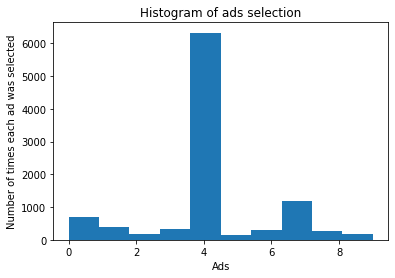

In [8]:
plt.hist(ads_selected) # [0, 2, 9 ....] histogram plots how many times all values occured
plt.title('Histogram of ads selection')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

The lesser number of N we put, the more unstable results we get.
At N = 500, UCB doesn't predict ad 5 as best ad.
Therefore, large sample size is required.